In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json('C:/Users/Jonat/Desktop/Springboard/Unit 26/ultimate_challenge/logins.json')

In [3]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


After a quick inspection we can see the login_time is not in order and is not the index. Making it the index and adding a 1’s column will be an easy way to count the 15min intervals with  a resample method. 

In [5]:
data.set_index('login_time',inplace=True)

In [6]:
data.sort_index(inplace=True)

In [7]:
data['Count'] = 1

In [8]:
data.head(10)

,Count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
1970-01-01 20:21:41,1
1970-01-01 20:26:05,1
1970-01-01 20:26:21,1
1970-01-01 20:31:03,1


In [9]:
data_15 = data.resample('15Min').count()

In [10]:
data_15

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


The resample was successful and we can  now plot the data to see what days and what hours are the busiest. 

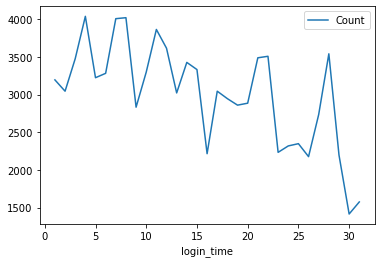

In [11]:
data.groupby(data.index.day).count().plot()

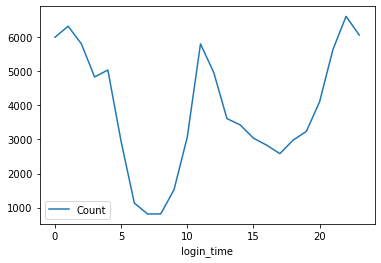

In [12]:
data.groupby(data.index.hour).count().plot()

(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]),
 <a list of 8 Text major ticklabel objects>)

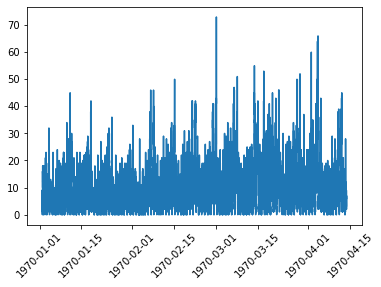

In [13]:
plt.plot(data_15)
plt.xticks(rotation=45)

We can see that the beginning of the month tends to be busier than the end. The spikes could possibly be weekends or another specific day. 
When looking at the hours we can see the late at night and noon are the busiest hours.


**Part 2**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.


1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?


A: I would look reimbursement metrics to see if people are taking advantage of the reimbursement. This metric tells us explicitly if people are using the reimbursement program to go to the neighboring city. 

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a.	how you will implement the experiment:
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


A:The experiment would be to log all the activity before the change and after and see if the reimbursement is being used. If the reimbursement is indeed being used I would check for increased activity on the opposite circadian rhythms to see if it is smoothing out and people are taking advantage of both cities.

B: A Linear Regression or Random Forest Regression test would show us if the reimbursement is generating more activity 
    
C: I would see how the results are during the weekdays vs weekends and see if it is cost efficient to keep the reimbursement program. Perhaps it is only efficient on the weekdays but not weekends. 

**Part 3**

In [14]:
data2 = pd.read_json('C:/Users/Jonat/Desktop/Springboard/Unit 26/ultimate_challenge/ultimate_data_challenge.json')

In [15]:
data2

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [16]:
data2.info(),data2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


(None,
 city                         0
 trips_in_first_30_days       0
 signup_date                  0
 avg_rating_of_driver      8122
 avg_surge                    0
 last_trip_date               0
 phone                      396
 surge_pct                    0
 ultimate_black_user          0
 weekday_pct                  0
 avg_dist                     0
 avg_rating_by_driver       201
 dtype: int64)

Going to drop the avg_rating_of_driver column as 16% of the data is missing. 
The phone column we can do a forward  fill with.
The avg_rating_by_driver column we can fill with the mean. 
The time columns will need to be converted into datetime objects

In [17]:
data2.drop(columns='avg_rating_of_driver',inplace=True)

In [18]:
data2['phone'].fillna(method='ffill',inplace=True)

In [19]:
data2['avg_rating_by_driver'].fillna(data2['avg_rating_by_driver'].mean(),inplace=True)

In [20]:
data2['last_trip_date'] = pd.to_datetime(data2['last_trip_date'], format='%Y-%m-%d')
data2['signup_date'] = pd.to_datetime(data2['signup_date'], format='%Y-%m-%d')

In [21]:
data2['signup_date'].value_counts()

2014-01-18    2948
2014-01-25    2885
2014-01-11    2402
2014-01-24    2284
2014-01-17    2149
2014-01-31    2100
2014-01-19    2028
2014-01-10    2021
2014-01-06    1763
2014-01-01    1737
2014-01-26    1708
2014-01-23    1606
2014-01-07    1486
2014-01-04    1485
2014-01-30    1471
2014-01-09    1433
2014-01-16    1431
2014-01-22    1369
2014-01-05    1343
2014-01-12    1334
2014-01-20    1295
2014-01-28    1284
2014-01-08    1275
2014-01-27    1236
2014-01-21    1234
2014-01-03    1213
2014-01-29    1197
2014-01-14    1120
2014-01-15    1110
2014-01-13    1049
2014-01-02    1004
Name: signup_date, dtype: int64

In [22]:
data2.info(),data2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   phone                   50000 non-null  object        
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 3.9+ MB


(None,
 city                      0
 trips_in_first_30_days    0
 signup_date               0
 avg_surge                 0
 last_trip_date            0
 phone                     0
 surge_pct                 0
 ultimate_black_user       0
 weekday_pct               0
 avg_dist                  0
 avg_rating_by_driver      0
 dtype: int64)

The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. So any trip within the last 30days = Retained

In [23]:
last_day = data2['last_trip_date'].max()

In [24]:
thirty_days_earlier = last_day - timedelta(30)

In [25]:
data2['Retained'] = data2['last_trip_date'] >= thirty_days_earlier

In [26]:
data2.head()

,city,trips_in_first_30_days,signup_date,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retained
0,King's Landing,4,2014-01-25,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [27]:
#percentage retained
data2['Retained'].sum()/len(data2)

0.37608

We see that 37.6% of people who signed up in January are active as they have taken a ride in the past 30 days since 2014-07-01

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [29]:
#We need to change the categorical data into numerical features for the regression analysis
dummies = pd.get_dummies(data2[['phone','city']])
dummies_drop = dummies.drop('phone_iPhone',axis=1)

In [30]:
dummies_drop.head()

,phone_Android,city_Astapor,city_King's Landing,city_Winterfell
0,0,0,1,0
1,1,1,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,1


In [31]:
data2 = data2.join(dummies_drop,how='outer')

In [32]:
data2.drop(columns=['phone','city','signup_date','last_trip_date'],inplace=True)

In [33]:
data2.head()

,trips_in_first_30_days,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retained,phone_Android,city_Astapor,city_King's Landing,city_Winterfell
0,4,1.10,15.4,True,46.2,3.67,5.0,True,0,0,1,0
1,0,1.00,0.0,False,50.0,8.26,5.0,False,1,1,0,0
2,3,1.00,0.0,False,100.0,0.77,5.0,False,0,1,0,0
3,9,1.14,20.0,True,80.0,2.36,4.9,True,0,0,1,0
4,14,1.19,11.8,False,82.4,3.13,4.9,False,1,0,0,1


In [34]:
X = data2.drop(columns=['Retained'])
y = data2['Retained']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=123)

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(37500, 11) (37500,)
(12500, 11) (12500,)


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [37]:
LRegression = LogisticRegression()
LRegression.fit(X_train_scaled,y_train)

LogisticRegression()

In [38]:
print('Train Accuracy',accuracy_score(y_train,LRegression.predict(X_train_scaled)))
print('Test Accuracy',accuracy_score(y_test,LRegression.predict(X_test_scaled)))

Train Accuracy 0.7187466666666666
Test Accuracy 0.71288


In [39]:
y_pred = LRegression.predict(X_test_scaled)

In [40]:
confusion_matrix(y_test,y_pred)

array([[6616, 1138],
       [2451, 2295]], dtype=int64)

In [41]:
f1_score(y_test,y_pred)

0.5611932999144149

In [42]:
param_grid = {'C' : [0.001, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train_scaled,y_train)
print(grid.best_params_)

{'C': 0.001}


In [43]:
LRegression = LogisticRegression(C=.001)
LRegression.fit(X_train_scaled,y_train)
print('Train Accuracy',accuracy_score(LRegression.predict(X_train_scaled),y_train))
print('Test Accuracy',accuracy_score(LRegression.predict(X_test_scaled),y_test))
y_pred = LRegression.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)
f1_score(y_test,y_pred)

Train Accuracy 0.7191733333333333
Test Accuracy 0.71344


0.549433962264151

In [44]:
X_train_columns = X_train.columns

In [88]:
#Feature Importance
feature_df = pd.DataFrame({'Feature':X_train_columns,'Importance':LRegression.coef_[0]})

In [93]:
feature_df.sort_values(by='Importance',ascending=False)

,Feature,Importance
9,city_King's Landing,0.384596
0,trips_in_first_30_days,0.378551
3,ultimate_black_user,0.367846
2,surge_pct,0.050876
4,weekday_pct,0.007960
1,avg_surge,-0.009758
10,city_Winterfell,-0.057922
6,avg_rating_by_driver,-0.061577
5,avg_dist,-0.181701
8,city_Astapor,-0.266153


We see that the top features are city_King's Landing, trips_in_first_30_days,ultimate_black_user.
trips_in_first_30_days & ultimate_black_user could indicate that these users are using the service for the long run and perhaps people from city_King's Landing are more likely to be long term customers.  